In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy.stats import kurtosis, skew
from pandas.plotting import table
import dataframe_image as dfi
import scipy.stats as stats
import seaborn as sb
import sklearn
from sklearn.metrics import confusion_matrix, classification_report
import pomegranate as po
import seaborn as sns

In [2]:
data= []

time = []

curr_X = []
curr_Y = []

delta_X = []
delta_Y = []

delta_time = []

disp = []

nonX = []
nonY = []
nonS = []


for i in range(31,32):
    participant = i
    zeros = 4 - len(str(participant))
    data.append(pd.read_csv("data/Participant"+ zeros*'0' + str(participant) + ".tsv",sep="\t"))


    time.append(data[-1]['Eyetracker timestamp'])
    curr_X.append(data[-1]['Gaze point X'])
    curr_Y.append(data[-1]['Gaze point Y'])
    delta_X.append(np.diff(curr_X[-1]))
    delta_Y.append(np.diff(curr_Y[-1]))
    delta_time.append(np.diff(time[-1]))
    disp.append(np.sqrt(np.diff(curr_X[-1])**2 + np.diff(curr_Y[-1])**2))
    #speed.append(disp[-1]/delta_time[-1])

    #remove NaN/missing
    #nonX.append(d_X[-1][np.logical_not(np.isnan(d_X[-1]))])
    #nonY.append(d_Y[-1][np.logical_not(np.isnan(d_Y[-1]))])
    #nonS.append(d_S[-1][np.logical_not(np.isnan(d_S[-1]))])


c:\python39\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (37,38) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
a = data[0]
print(a.columns)

Index(['Recording timestamp', 'Computer timestamp', 'Sensor', 'Project name',
       'Export date', 'Participant name', 'Recording name', 'Recording date',
       'Recording date UTC', 'Recording start time',
       'Recording start time UTC', 'Recording duration', 'Timeline name',
       'Recording Fixation filter name', 'Recording software version',
       'Recording resolution height', 'Recording resolution width',
       'Recording monitor latency', 'Average calibration accuracy (mm)',
       'Average calibration precision SD (mm)',
       'Average calibration precision RMS (mm)',
       'Average calibration accuracy (degrees)',
       'Average calibration precision SD (degrees)',
       'Average calibration precision RMS (degrees)',
       'Average calibration accuracy (pixels)',
       'Average calibration precision SD (pixels)',
       'Average calibration precision RMS (pixels)',
       'Average validation accuracy (mm)',
       'Average validation precision SD (mm)',
       'A

In [4]:
a['Eye position left Y (DACSmm)'].dropna()

2         -72,9
3         -72,9
4         -72,9
5         -72,9
6         -71,6
          ...  
117798    -42,0
117800    -41,8
117801    -41,8
117805    -41,5
117806    -41,5
Name: Eye position left Y (DACSmm), Length: 105339, dtype: object

In [5]:
np.sqrt(float(np.array(data[-1]['Eye position left X (DACSmm)'].dropna())[10000].replace(',','.'))**2 + float(np.array(data[-1]['Eye position left Y (DACSmm)'].dropna())[10000].replace(',','.'))**2 + float(np.array(data[-1]['Eye position left Z (DACSmm)'].dropna())[10000].replace(',','.'))**2)

667.3613863567475

In [6]:
test = pd.read_csv("data/Participant"+ zeros*'0' + str(participant) + ".tsv",sep="\t")

In [7]:
x_val3 = test.iloc[:, 39:40].values
y_val3 = test.iloc[:, 40:41].values
t_stamps3 = test.iloc[:, 0:1].values
f_type3 = test.iloc[:, 79:80].values

x_val2 = np.array(x_val3).sum(axis=1)
y_val2 = np.array(y_val3).sum(axis=1)
t_stamps2 = np.array(t_stamps3).sum(axis=1)
f_type2 = np.array(f_type3).sum(axis=1)

#print(x_val2[6])
#print(y_val2[6])
print(len(x_val2))
print(len(y_val2))
print(len(t_stamps2))

x_val = []
y_val = []
t_stamps = []
f_type = []

for i in range(len(x_val2)):
    if math.isnan(x_val2[i]):
        pass
    elif math.isnan(y_val2[i]):
        pass
    else:
        x_val.append(x_val2[i])
        y_val.append(y_val2[i])
        t_stamps.append(t_stamps2[i]/1000000)
        f_type.append(f_type2[i])
        
print(len(x_val))
print(len(y_val))
print(len(t_stamps))


117809
117809
117809
112244
112244
112244


In [8]:
# Feature Duration

print("Timestamps")
#print(fix_timestamp)

duration_diff = []

#t_stamps = test.iloc[:, 0:1].values
        
#print(len(t_stamps))  

#Print diff in timestamps for easy feature seperation

for i in range(len(x_val)-1):
    
    if math.isnan(t_stamps[i+1] - t_stamps[i]):
        pass
    else:
        duration_diff.append(t_stamps[i+1] - t_stamps[i])

#print(duration_diff)
print(len(duration_diff))




Timestamps
112243


In [9]:
# Feature Displacement

point_disp = []  
x_point_len = []
y_point_len = []
    
for i in range(len(x_val)-1):
    
    x_point_len.append(x_val[i+1] - x_val[i])
    
    y_point_len.append(y_val[i+1] - y_val[i])
        
    point_disp.append(np.sqrt(x_point_len[i]**2 + y_point_len[i]**2))

    
    
print(len(point_disp))
#print(point_disp)


112243


In [10]:
#Velocity

point_velo = []
    
for i in range(len(point_disp)):
        
    point_velo.append(point_disp[i]/(duration_diff[i]))

print(len(point_velo))

#plt.scatter(point_disp,duration_diff)
#plt.xlabel("Displacement")
#plt.ylim(0, 1)
#plt.xlim(0, 3.5)
#plt.ylabel("Duration")
#plt.title("Duration v. Displacment (All Points)")
#plt.savefig("Fixations_feat_velo")
#plt.show()

#plt.scatter(point_velo,duration_diff)
#plt.xlabel("Velocity")
#plt.ylim(0, 1)
#plt.xlim(0, 3.5)
#plt.ylabel("Duration")
#plt.title("Velocity v. Displacment (All Points)")
#plt.savefig("Fixations_feat_velo")
#plt.show()

#plt.scatter(point_velo,point_disp)
#plt.xlabel("Velocity (Pixels/Second)")
#plt.ylabel("Displacement (Pixels)")
#plt.ylim(0, 400000)
#plt.xlim(0, 3.5)
#plt.title("Velocity v. Displacment (All Points)")
#plt.savefig("Fixations_feat_velo")
#plt.show()

#sb.histplot(point_velo, element = 'poly', fill= False)
#plt.hist(point_velo,500,range=[0,30000]) 
#plt.title("Velocity (All Points)")
#plt.xlabel("Velocity (Pixels/Second)")
#plt.ylabel("Frequency")
#plt.show()

#sb.histplot(point_disp, element = 'poly', fill= False)
#plt.hist(point_disp,500,range=[0,300])
#plt.title("Displacement (All Points)")
#plt.xlabel("Displacement (Pixels)")
#plt.ylabel("Frequency")
#plt.show()

112243


In [11]:
a = np.array(point_velo)[np.array(point_velo) != 0]

(array([9.4562e+04, 1.5809e+04, 9.5600e+02, 1.5400e+02, 3.5000e+01,
        9.0000e+00, 4.0000e+00, 2.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([-5.44636597e+00,  9.67540398e+03,  1.93562543e+04,  2.90371047e+04,
         3.87179550e+04,  4.83988053e+04,  5.80796557e+04,  6.77605060e+04,
         7.74413564e+04,  8.71222067e+04,  9.68030570e+04]),
 <BarContainer object of 10 artists>)

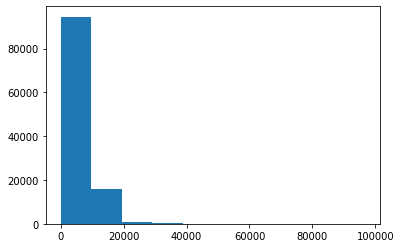

In [12]:
plt.hist(a)

In [13]:
#Angle

theta_np = []

ang_time = []

duration_diff_corr = []

point_velo_corr = []

point_disp_corr = []

f_type_corr = []

x_val_corr = []

y_val_corr = []

for i in range(len(duration_diff)-1):
    vec1 = [x_point_len[i],y_point_len[i]]
    vec2 = [x_point_len[i+1],y_point_len[i+1]]
 
    unit1 = vec1 / np.linalg.norm(vec1)
    unit2 = vec2 / np.linalg.norm(vec2)
    dot_product = np.dot(unit1, unit2)
    #print(np.arccos(dot_product))
    
    if (math.isnan(np.arccos(dot_product))):
        pass
    else:
        theta_np.append(abs(math.pi - np.arccos(dot_product)))
        ang_time.append(t_stamps[i+1])
        duration_diff_corr.append(duration_diff[i])
        point_velo_corr.append(point_velo[i])
        point_disp_corr.append(point_disp[i])
        f_type_corr.append(f_type[i])
        x_val_corr.append(x_val[i+1])
        y_val_corr.append(y_val[i+1])
        
#print(len(theta_np))

#print(len(duration_diff))
#print(len(duration_diff_corr))

#sb.histplot(theta_np, element = 'poly', fill= False)
#plt.hist(theta_np,200)
#plt.title("Angle Change (All Points)")
#plt.xlabel("Angle Change (Radians)")
#plt.ylabel("Frequency")
#plt.show()

<ipython-input-13-7be61cc048b6>:24: RuntimeWarning: invalid value encountered in true_divide
  unit2 = vec2 / np.linalg.norm(vec2)
<ipython-input-13-7be61cc048b6>:23: RuntimeWarning: invalid value encountered in true_divide
  unit1 = vec1 / np.linalg.norm(vec1)
<ipython-input-13-7be61cc048b6>:28: RuntimeWarning: invalid value encountered in arccos
  if (math.isnan(np.arccos(dot_product))):


In [14]:
point_velo_eff = []

print(point_velo_corr[0])
print(theta_np[0])

print(point_velo_corr[0] * np.cos(theta_np[0]))

for i in range(len(point_velo_corr)):
    point_velo_eff.append(point_velo_corr[i] * np.cos(theta_np[i]))

5193.003658073282
2.6162813893415664
-4492.82001770955


In [15]:
#Eye-Tracker Algorithm

f_type_corr

x_fix = []
y_fix = []

x_sac = []
y_sac = []

fix_timestamp = []
sac_timestamp = []

fix_duration = []
sac_duration = []

fix_displacement = []
sac_displacement = []

fix_velo = []
sac_velo = []
out_velo = []

fix_velo_eff = []
sac_velo_eff = []

fix_theta = []
sac_theta = []

classifier = []

outliers = []

for i in range (len(f_type_corr)):
    if f_type_corr[i] == "Fixation":
        x_fix.append(x_val_corr[i])
        y_fix.append(y_val_corr[i])
        fix_timestamp.append(ang_time[i])
        fix_duration.append(duration_diff_corr[i])
        fix_displacement.append(point_disp_corr[i])
        fix_velo.append(point_velo_corr[i])
        fix_theta.append(theta_np[i])
        fix_velo_eff.append(point_velo_eff[i])
        classifier.append("fixation")
        
    elif f_type_corr[i] == "Saccade":
        x_sac.append(x_val_corr[i])
        y_sac.append(y_val_corr[i])
        sac_timestamp.append(ang_time[i])
        sac_duration.append(duration_diff_corr[i])
        sac_displacement.append(point_disp_corr[i])
        sac_velo.append(point_velo_corr[i])
        sac_theta.append(theta_np[i])
        sac_velo_eff.append(point_velo_eff[i])
        classifier.append("saccade")
        
    else:
        classifier.append("outlier")
        out_velo.append(point_velo_corr[i])
        

print(len(f_type_corr))
print(len(x_val_corr))
print(len(y_val_corr))
print(len(ang_time))
print(len(classifier))

#print(len(x_sac + y_sac))

#print(outliers)
#print(len(outliers))

x_fix_s = []
y_fix_s = []
x_sac_s = []
y_sac_s = []

for j in range(4117):
    x_fix_s.append(x_fix[j])
    y_fix_s.append(y_fix[j])
    x_sac_s.append(x_sac[j])
    y_sac_s.append(y_sac[j])


110793
110793
110793
110793
110793


In [16]:
#np.savetxt('x_values.txt', np.array(x_val_corr), fmt='%.2f')
#np.savetxt('y_values.txt', np.array(y_val_corr), fmt='%.2f')
#np.savetxt('timestamps.txt', np.array(ang_time), fmt='%.2f')
#np.savetxt('eyetracker.txt', np.array(x_val_corr), fmt='%.2f')

#textfile = open("eyetracker.txt", "w")
#for element in classifier:
    #textfile.write(element + "\n")
#textfile.close()

<ipython-input-17-536ebcf1c41d>:1: RuntimeWarning: invalid value encountered in log
  trash = plt.hist(np.log(np.array(point_velo_corr)[np.array(point_velo_corr) != 0]),100)


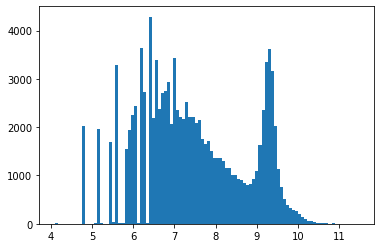

In [17]:
trash = plt.hist(np.log(np.array(point_velo_corr)[np.array(point_velo_corr) != 0]),100)


Fixations

<ipython-input-18-b74649be379c>:1: RuntimeWarning: invalid value encountered in log
  trash = plt.hist(np.log(np.array(fix_velo)[np.array(fix_velo) != 0]),100)


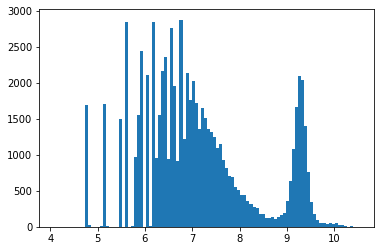

In [18]:
trash = plt.hist(np.log(np.array(fix_velo)[np.array(fix_velo) != 0]),100)

In [19]:
np.mean(np.log(np.array(fix_velo)[np.array(fix_velo) > 0.1]))

7.085071116642642

In [20]:
np.std(np.log(np.array(fix_velo)[np.array(fix_velo) > 0.1]))

1.2174758590768573

Saccades

In [21]:
np.mean(np.log(np.array(sac_velo)[np.array(sac_velo) > 0.1]))

8.265543524761522

In [22]:
np.std(np.log(np.array(sac_velo)[np.array(sac_velo) > 0.1]))

1.064378655221646

<ipython-input-23-26911ebf10b8>:1: RuntimeWarning: invalid value encountered in log
  trash = plt.hist(np.log(np.array(sac_velo)[np.array(sac_velo) != 0]),100)


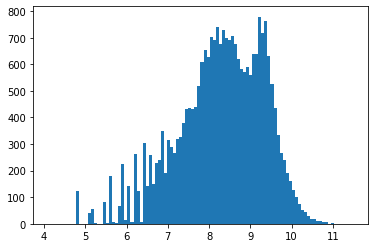

In [23]:
trash = plt.hist(np.log(np.array(sac_velo)[np.array(sac_velo) != 0]),100) 

<ipython-input-24-c4c0d459c850>:1: RuntimeWarning: invalid value encountered in log
  plt.hist(np.log(np.array(sac_velo)[np.array(sac_velo) != 0]),100,color = "red")
<ipython-input-24-c4c0d459c850>:2: RuntimeWarning: invalid value encountered in log
  plt.hist(np.log(np.array(fix_velo)[np.array(fix_velo) != 0]),100,color = "blue", alpha=0.5)


(array([3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.688e+03, 2.000e+01,
        4.000e+00, 0.000e+00, 0.000e+00, 6.000e+00, 1.697e+03, 6.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 1.498e+03, 3.000e+00, 2.848e+03,
        0.000e+00, 1.000e+01, 9.670e+02, 1.554e+03, 2.439e+03, 4.000e+00,
        2.102e+03, 8.000e+00, 2.846e+03, 9.560e+02, 1.554e+03, 2.166e+03,
        2.352e+03, 9.340e+02, 2.754e+03, 1.951e+03, 9.070e+02, 2.873e+03,
        1.222e+03, 2.134e+03, 1.763e+03, 2.016e+03, 1.723e+03, 1.359e+03,
        1.645e+03, 1.507e+03, 1.353e+03, 1.312e+03, 1.252e+03, 1.094e+03,
        1.147e+03, 9.280e+02, 8.130e+02, 7.080e+02, 6.900e+02, 5.470e+02,
        5.070e+02, 4.350e+02, 4.370e+02, 3.570e+02, 3.100e+02, 2.700e+02,
        2.580e+02, 1.830e+02, 1.830e+02, 1.250e+02, 1.270e+02, 1.320e+02,
        1.150e+02, 1.340e+02, 1.610e+02, 1.970e+02, 3.550e+02, 6.370e+02,
        1.086e+03, 1.668e+03, 2.088e+0

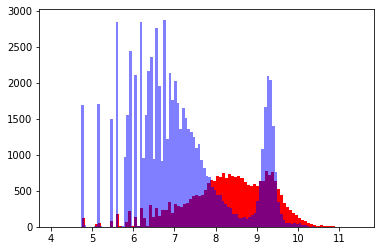

In [24]:
plt.hist(np.log(np.array(sac_velo)[np.array(sac_velo) != 0]),100,color = "red")
plt.hist(np.log(np.array(fix_velo)[np.array(fix_velo) != 0]),100,color = "blue", alpha=0.5)

Outliers

In [25]:
#outlier mean
np.mean(np.log(np.array(out_velo)[np.array(out_velo) > 0.1]))

7.571945685925002

In [26]:
#outlier std
np.std(np.log(np.array(out_velo)[np.array(out_velo) > 0.1]))

1.2518879308807083

<ipython-input-27-11085476a210>:2: RuntimeWarning: invalid value encountered in log
  trash = plt.hist(np.log(np.array(out_velo)[np.array(out_velo) != 0]),100)


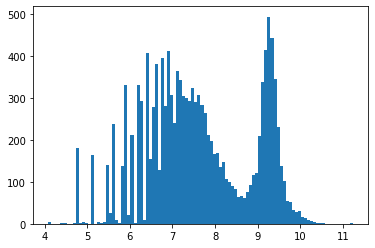

In [27]:
#outlier hist
trash = plt.hist(np.log(np.array(out_velo)[np.array(out_velo) != 0]),100) 

In [28]:
#Parameters for probability distribution

transition = 0
fixat = 0
sacca = 0
outlie = 0

for i in range(len(classifier)-1):
    if classifier[i] != classifier[i+1]:
        transition = transition + 1
        
for j in range(len(classifier)-1):
    if classifier[j] == "fixation":
        fixat = fixat + 1
    elif classifier[j] == "saccade":
        sacca = sacca + 1
    else:
        outlie = outlie + 1

print(fixat/len(classifier))        
print(sacca/len(classifier))
print(outlie/len(classifier))
print("\n" + str(transition/len(classifier)))


0.6524960963237749
0.22863357793362396
0.11886129990161834

0.14453981749749534


In [29]:
#classifier

In [39]:
0.146/(0.621+0.146)

0.119


In [ ]:
0.652
0.229
0.119

In [47]:
new_velo = np.array(point_velo_corr)[[np.array(point_velo_corr)>1]]

<ipython-input-47-62bbbe593f23>:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_velo = np.array(point_velo_corr)[[np.array(point_velo_corr)>1]]


In [48]:
for i in range (len(point_velo_corr)):
    if point_velo_corr[i] < 0:
        print(i)

4969
9697
17321
35849
58477
83157
104430


In [49]:
from pomegranate import *
s1 = State(LogNormalDistribution(7.09, 1.22)) #fixations
s2 = State(LogNormalDistribution(8.27, 1.06)) #saccades
s3 = State(LogNormalDistribution(7.57, 1.25)) #outliers
model = HiddenMarkovModel()
model.add_states(s1, s2, s3)
model.add_transition(model.start, s1, 1.0)
model.add_transition(s1, s1, 0.652)
model.add_transition(s1, s2, 0.229)
model.add_transition(s1, s3, 0.119)        
model.add_transition(s2, s1, 0.652)
model.add_transition(s2, s2, 0.229)
model.add_transition(s2, s3, 0.119)
model.add_transition(s3, s1, 0.652)
model.add_transition(s3, s2, 0.229)
model.add_transition(s3, s3, 0.119)
model.add_transition(s3, model.end, 0.1)
model.bake()

In [50]:
np.sum([np.array(new_velo)<=0])

0

In [51]:
#sequence2 = model.sample()

In [52]:
new_velo[2]

2888.711665777215

In [53]:
#len(new_velo) - len(point_velo)

In [54]:
model.fit([new_velo])

{
    "class" : "HiddenMarkovModel",
    "name" : "None",
    "start" : {
        "class" : "State",
        "distribution" : null,
        "name" : "None-start",
        "weight" : 1.0
    },
    "end" : {
        "class" : "State",
        "distribution" : null,
        "name" : "None-end",
        "weight" : 1.0
    },
    "states" : [
        {
            "class" : "State",
            "distribution" : {
                "class" : "Distribution",
                "name" : "LogNormalDistribution",
                "parameters" : [
                    7.84701526381963,
                    1.135354336132405
                ],
                "frozen" : false
            },
            "name" : "2b681824-0f4d-4da6-b79a-7effe9805e86",
            "weight" : 1.0
        },
        {
            "class" : "State",
            "distribution" : {
                "class" : "Distribution",
                "name" : "LogNormalDistribution",
                "parameters" : [
                    6.6

In [55]:
#sequence = model.sample()

In [56]:
#sequence

In [57]:
#model.fit([sequence])

In [58]:
model.viterbi(new_velo)[1][100][0]

0

In [59]:
#model.viterbi(point_velo_corr)[1][100][0]

In [64]:
0 in fix_velo

110786


In [65]:
count = 0

x_fix = []
y_fix = []

x_sac = []
y_sac = []

x_out = []
y_out = []

fix_timestamp = []
sac_timestamp = []
out_timestamp = []

fix_duration = []
sac_duration = []
out_duration = []

fix_displacement = []
sac_displacement = []
out_displacement = []

fix_velo = []
sac_velo = []
out_velo = []

fix_theta = []
sac_theta = []
out_theta = []

classifier = []

outliers = []

for j in range (len(new_velo)):
    if model.viterbi(new_velo)[1][j][0] == 2:
        x_fix.append(x_val_corr[j])
        y_fix.append(y_val_corr[j])
        fix_timestamp.append(ang_time[j])
        fix_duration.append(duration_diff_corr[j])
        fix_displacement.append(point_disp_corr[j])
        fix_velo.append(point_velo_corr[j])
        fix_theta.append(theta_np[j])
        classifier.append("fixation")
    elif model.viterbi(new_velo)[1][j][0] == 0:
        x_sac.append(x_val_corr[j])
        y_sac.append(y_val_corr[j])
        sac_timestamp.append(ang_time[j])
        sac_duration.append(duration_diff_corr[j])
        sac_displacement.append(point_disp_corr[j])
        sac_velo.append(point_velo_corr[j])
        sac_theta.append(theta_np[j])
        classifier.append("saccade")    
    else:
        x_out.append(x_val_corr[j])
        y_out.append(y_val_corr[j])
        out_timestamp.append(ang_time[j])
        out_duration.append(duration_diff_corr[j])
        out_displacement.append(point_disp_corr[j])
        out_velo.append(point_velo_corr[j])
        out_theta.append(theta_np[j])
        classifier.append("outlier")        
    
print(len(x_fix))
print(len(x_sac))
print(len(x_out))


x_fix_s = []
y_fix_s = []
x_sac_s = []
y_sac_s = []

for k in range(4117):
    x_fix_s.append(x_fix[k])
    y_fix_s.append(y_fix[k])
    x_sac_s.append(x_sac[k])
    y_sac_s.append(y_sac[k])


18776
28385
63625


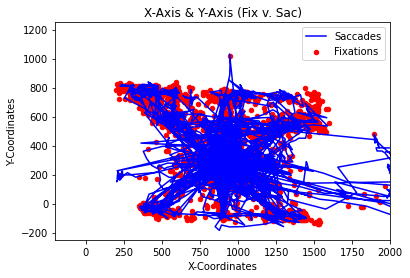

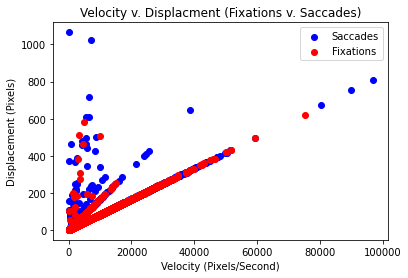

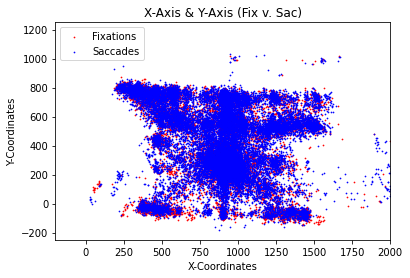

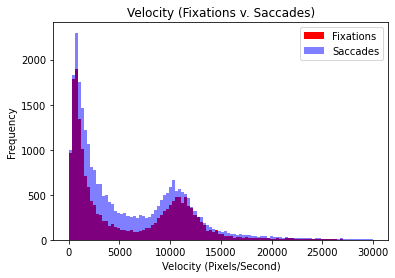

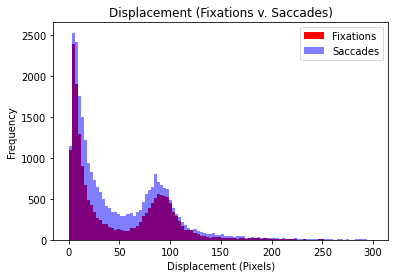

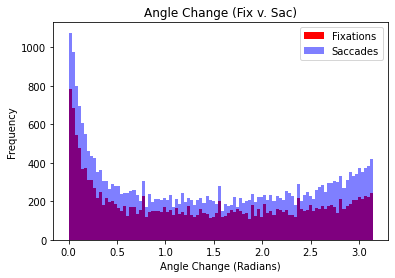

In [66]:
plt.scatter(x_fix_s,y_fix_s, s=20.0, c="red",label="Fixations")
plt.plot(x_sac_s,y_sac_s, c="blue",label="Saccades")
plt.legend()
plt.ylabel("Y-Coordinates")
plt.ylim(-250, 1250)
plt.xlim(-200, 2000)
plt.xlabel("X-Coordinates")
plt.title("X-Axis & Y-Axis (Fix v. Sac)")
plt.savefig("X_y_fix_sac")
plt.show()

plt.scatter(sac_velo,sac_displacement, c="blue",label="Saccades")
plt.scatter(fix_velo,fix_displacement, c="red",label="Fixations")
plt.legend()
plt.xlabel("Velocity (Pixels/Second)")
plt.ylabel("Displacement (Pixels)")
#plt.ylim(0, 400000)
#plt.xlim(0, 3.5)
plt.title("Velocity v. Displacment (Fixations v. Saccades)")
plt.savefig("Fixations_saccades_velo_disp")
plt.show()

plt.scatter(x_fix,y_fix, s=0.5, c="red",label="Fixations")
plt.scatter(x_sac,y_sac, s=0.5, c="blue",label="Saccades")
plt.legend()
plt.ylabel("Y-Coordinates")
plt.ylim(-250, 1250)
plt.xlim(-200, 2000)
plt.xlabel("X-Coordinates")
plt.title("X-Axis & Y-Axis (Fix v. Sac)")
#plt.savefig("Fixations_feat_velo")
plt.show()

#sb.histplot(fix_velo, element = 'poly', fill= False)
#sb.histplot(sac_velo, element = 'poly', fill= False)
plt.hist(fix_velo,100,range=[0,30000], color ="red",label="Fixations")
plt.hist(sac_velo,100,range=[0,30000], color ="blue",label="Saccades", alpha=0.5)
plt.legend()
plt.title("Velocity (Fixations v. Saccades)")
plt.xlabel("Velocity (Pixels/Second)")
plt.ylabel("Frequency")
plt.savefig("Fixations_saccades_velo_hist")
plt.show()

#sb.histplot(fix_displacement, element = 'poly', fill= False)
#sb.histplot(sac_displacement, element = 'poly', fill= False)
plt.hist(fix_displacement,100,range=[0,300], color ="red",label="Fixations")
plt.hist(sac_displacement,100,range=[0,300], color ="blue",label="Saccades", alpha=0.5)
plt.legend()
plt.title("Displacement (Fixations v. Saccades)")
plt.xlabel("Displacement (Pixels)")
plt.ylabel("Frequency")
plt.savefig("Fixations_saccades_disp_hist")
plt.show()

#sb.histplot(fix_theta, element = 'poly', fill= False)
#sb.histplot(sac_theta, element = 'poly', fill= False)
plt.hist(fix_theta,100, color ="red",label="Fixations")
plt.hist(sac_theta,100, color ="blue",label="Saccades", alpha=0.5)
plt.legend()
plt.title("Angle Change (Fix v. Sac)")
plt.xlabel("Angle Change (Radians)")
plt.ylabel("Frequency")
plt.savefig("Fix_v_sac_angle_hist")
plt.show()

#plt.hist(fix_velo_eff,100,range=[-25000,25000],color ="red",label="Fixations")
#plt.legend()
#plt.title("Velocity-Angle Change (Fix)")
#plt.xlabel("Velocity-Angle Change (Radians)")
#plt.ylabel("Frequency")
#plt.savefig("Fix_vel_angle_hist")
#plt.show()

#plt.hist(sac_velo_eff,100,range=[-25000,25000],color ="blue",label="Saccades")
#plt.legend()
#plt.title("Velocity-Angle Change (Sac)")
#plt.xlabel("Velocity-Angle Change (Radians)")
#plt.ylabel("Frequency")
#plt.savefig("Sac_vel_angle_hist")
#plt.show()

In [48]:
textfile = open("hmm.txt", "w")
for element in classifier:
    textfile.write(element + "\n")
textfile.close()


In [49]:
from pomegranate import *

In [50]:
#Resume from here tomorrow

In [51]:
#Hamming Distance

results = pd.read_csv("text_results/results.csv")

original2 = results.iloc[:, 3:4].values
i_vt2 = results.iloc[:, 4:5].values
i_avt2 = results.iloc[:, 5:6].values
i_dt2 = results.iloc[:, 6:7].values
i_hmm2 = results.iloc[:, 7:8].values

original = np.array(original2).sum(axis=1)
i_vt = np.array(i_vt2).sum(axis=1)
i_avt = np.array(i_avt2).sum(axis=1)
i_dt = np.array(i_dt2).sum(axis=1)
i_hmm = np.array(i_hmm2).sum(axis=1)

algos = [i_vt,i_avt,i_dt,i_hmm]
names = ["I-VT","I-AVT","I-DT","I-HMM"]

hamming_distance = 0

for i in range(len(algos)):
    algo = algos[i]
    for j in range(len(original)):
        if algo[j] !=  original[j]:
            hamming_distance = hamming_distance + 1
        else:
            pass
    print("Hamming distance: " + str(hamming_distance))
    h_d = round((((len(original) - hamming_distance)/len(original))*100),2)
    print("Accuracy for " + str(names[i]) + ": " + str(h_d) + "%")
    print("\n")
    hamming_distance = 0



Hamming distance: 13852
Accuracy for I-VT: 65.51%


Hamming distance: 14194
Accuracy for I-AVT: 64.66%


Hamming distance: 13319
Accuracy for I-DT: 66.84%


Hamming distance: 20714
Accuracy for I-HMM: 48.43%




In [52]:
results = pd.read_csv("text_results/results.csv")

In [53]:
results.head()

,timestamps,x_values,y_values,eye_tracker,ivt,iavt,idt,ihmm
0,0.14,305,1074,outlier,saccade,saccade,saccade,outlier
1,0.15,296,1071,outlier,fixation,fixation,saccade,fixation
2,0.16,299,1073,outlier,fixation,fixation,saccade,fixation
3,0.17,301,1076,outlier,fixation,fixation,saccade,fixation
4,0.18,378,1080,outlier,saccade,saccade,saccade,saccade


In [54]:
results_top = results.head(10)
results_bottom = results.tail(10)
#print(results_top)
#print(results_bottom)

results_crop = pd.concat([results.head(10), results.tail(10)])

results_final = results.loc[6:25]

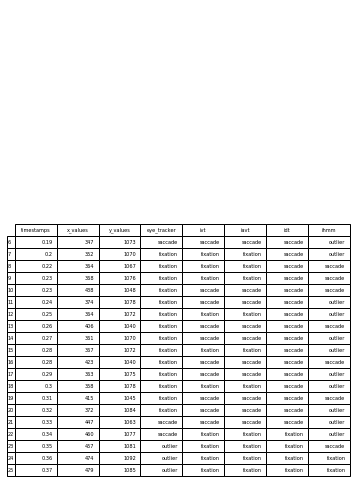

In [55]:
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, results_final.loc[6:25])  # where df is your data frame

plt.savefig('results_table_alt.png')

In [56]:
dfi.export(results_final,"results_table.png")

In [57]:
eye_t = results['eye_tracker']
i_vt = results['ivt']
i_avt = results['iavt']
i_dt = results['idt']
i_hmm = results['ihmm']

print(eye_t[3])
print(i_vt[3])
print(i_avt[3])
print(i_dt[3])
print(i_hmm[3])

outlier
fixation
fixation
saccade
fixation


In [62]:
all_acc = []
all_pre = []
all_rec = []

def calc_res(algo,name):

    comp = sklearn.metrics.confusion_maxrix(eye_t, algo)
    
    print(comp)
    

In [64]:
all_acc = []
all_pre = []
all_rec = []

def calc_res(algo,name):

    comp = sklearn.metrics.confusion_matrix(eye_t, algo)
    
    print(comp)

    comp_matrix = pd.DataFrame(comp,
            index = ['fixation','outlier','saccade'], 
            columns = ['fixation','outlier','saccade'])

    plt.figure(figsize=(5,4))
    sns.heatmap(comp_matrix, annot=True, cmap='Blues', fmt='g')
    plt.title('Confusion Matrix')
    plt.ylabel('Eye-tracker')
    plt.xlabel('Results')
    plt.savefig(name + "_confusion.png")
    plt.show()

    FN_tot = comp[0][1] + comp[0][2] + comp[1][0] + comp[1][2] + comp[2][0] + comp[2][1]
    FP_tot = comp[1][0] + comp[2][0] + comp[0][1] + comp[2][1] + comp[0][2] + comp[1][2]
    TN_tot = comp[1][1]*2 + comp[1][2] + comp[2][1] + comp[2][2]*2 + comp[0][0]*2 + comp[0][2] + comp[2][0] + comp[0][1] + comp[1][0]
    TP_tot = comp[0][0] + comp[1][1] + comp[2][2]

    all_acc.append((TP_tot + TN_tot)/(TP_tot + TN_tot + FP_tot + FN_tot))
    all_pre.append((TP_tot)/(TP_tot + FP_tot))
    all_rec.append((TP_tot)/(TP_tot + FN_tot))


[[21212     3  3714]
 [ 4068     1  1790]
 [ 4277     0  5098]]


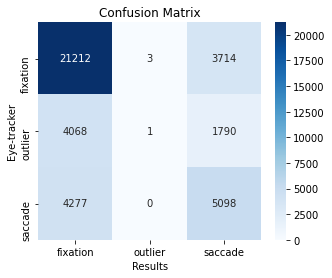

[[21488     0  3441]
 [ 4242     0  1617]
 [ 4894     0  4481]]


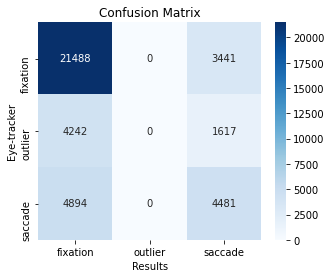

[[21756     0  3173]
 [ 3250     0  2609]
 [ 4287     0  5088]]


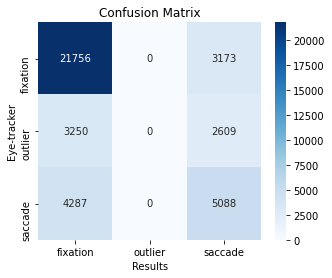

[[13004  3183  8742]
 [  679  1902  3278]
 [ 1108  3724  4543]]


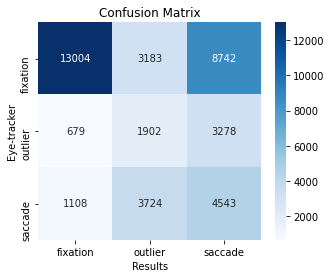

In [65]:
calc_res(i_vt,"ivt")
calc_res(i_avt,"iavt")
calc_res(i_dt,"idt")
calc_res(i_hmm,"ihmm")

In [61]:
class_rep = pd.read_csv("text_results/report.csv")
print(class_rep)
dfi.export(class_rep,"class_table.png")

         Unnamed: 0      I-VT     I-AVT      I-DT     I-HMM
0  Hamming Distance  13835.00  14192.00  13319.00  20714.00
1          Accuracy      0.66      0.65      0.67      0.48
2         Precision      0.48      0.39      0.40      0.46
3            Recall      0.47      0.45      0.47      0.44
4         F-1 Score      0.43      0.42      0.44      0.42
